<a href="https://colab.research.google.com/github/Tristan-Brown1096/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [24]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',
                 parse_dates=['created'])
assert df.shape == (49352, 34)

In [62]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [63]:
#checking the head of the data set to see what we're working with
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
#checking the types of data and number of non-null entries in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bathrooms             48818 non-null  float64       
 1   bedrooms              48818 non-null  int64         
 2   created               48818 non-null  datetime64[ns]
 3   description           47393 non-null  object        
 4   display_address       48685 non-null  object        
 5   latitude              48818 non-null  float64       
 6   longitude             48818 non-null  float64       
 7   price                 48818 non-null  int64         
 8   street_address        48808 non-null  object        
 9   interest_level        48818 non-null  object        
 10  elevator              48818 non-null  int64         
 11  cats_allowed          48818 non-null  int64         
 12  hardwood_floors       48818 non-null  int64         
 13  dogs_allowed    

In [65]:
#confirming that the majority of variables are categorical
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#EDA

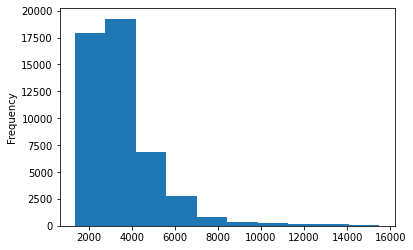

In [66]:
#graphing the price
df['price'].plot(kind='hist')

In [67]:
#checking the average and quartile values of price
df.describe()['price']

count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

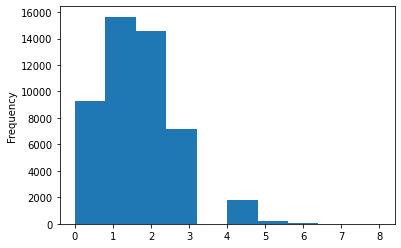

In [68]:
#graphing the number of bedrooms
df['bedrooms'].plot(kind='hist')

In [69]:
#checking the average number of bedrooms, as well as the quartile values
df.describe()['bedrooms']

count    48818.000000
mean         1.537158
std          1.106078
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bedrooms, dtype: float64

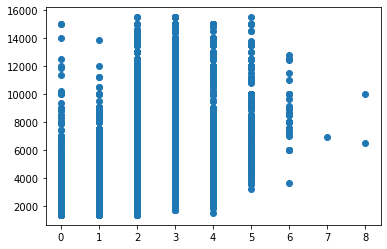

In [70]:
#graphing bedrooms against price
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(df['bedrooms'], df['price'])

fig.set_facecolor('w')

plt.show()

#Split the data

In [71]:
#setting the target variable
y = df['price']

#creating the feature matrix
X = df[['bedrooms']]

In [72]:
#confirming X has the correct shape
X.shape

(48818, 1)

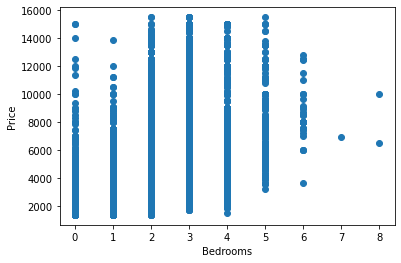

In [23]:
#checking the graph of X vs y
fig, ax = plt.subplots()

plt.scatter(X, y)

plt.xlabel('Bedrooms')
plt.ylabel('Price')

fig.set_facecolor('w')

plt.show()

In [73]:
#creating the mask
mask = X.index < 39482

#creating the training data
X_train, y_train = X.loc[mask], y.loc[mask]

#creating the validation data
X_val, y_val = X.loc[~mask], y.loc[~mask]

In [74]:
#checking the shapes of the data sets to confirm the number of entries
print(X_train.shape)
X_val.shape

(39054, 1)


(9764, 1)

#Establish Baseline

In [75]:
baseline_guess = y_train.mean()

MAE = abs(y_train - baseline_guess).mean()

print(f'''If my baseline model always predicts {baseline_guess}, on average, the prediction will be off by {MAE}''')

If my baseline model always predicts 3582.706918625493, on average, the prediction will be off by 1204.6730406617414


#Build the Model

In [76]:
#importing the linear regression function
from sklearn.linear_model import LinearRegression

#instantiating the predictor
lr = LinearRegression()

#training the predictor
lr.fit(X_train, y_train);

In [77]:
#linear regression outputs
print(lr.coef_[0])
lr.intercept_

855.4859868285281


2268.3506380476947

From the output of the linear regression model, the price goes up by 855 dollars and 49 cents for every bedroom, with a base price of $2268.35 with 0 bedrooms.

#Stretch Goal Version

In [87]:
#defining the target vector
y = df['price']

#defining the feature matrix
X = df[['bathrooms', 'bedrooms']]

In [88]:
#confirming the shape of the feature matrix
X.shape

(48818, 2)

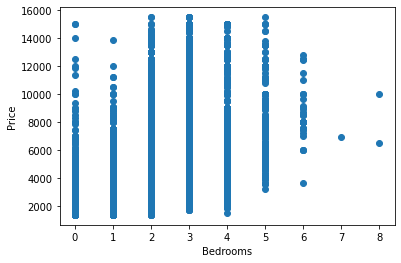

In [80]:
fig, ax = plt.subplots()

plt.scatter(X['bedrooms'], y)

plt.xlabel('Bedrooms')
plt.ylabel('Price')

fig.set_facecolor('w')

plt.show()

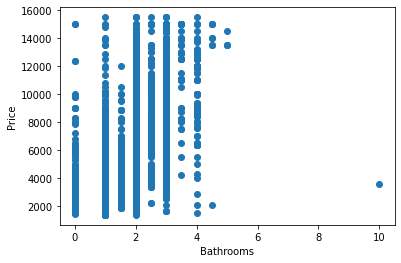

In [81]:
fig, ax = plt.subplots()

plt.scatter(X['bathrooms'], y)

plt.xlabel('Bathrooms')
plt.ylabel('Price')

fig.set_facecolor('w')

plt.show()

In [89]:
#creating the mask for the division of the data
mask = X.index < 39482

#defining the training data
X_train, y_train = X.loc[mask], y.loc[mask]

#defining the validation data
X_val, y_val = X.loc[~mask], y.loc[~mask]

In [90]:
#confirming the correct number of observations
print(X_train.shape)
X_val.shape

(39054, 2)


(9764, 2)

In [91]:
X_train.head()

,bathrooms,bedrooms
0,1.5,3
1,1.0,2
2,1.0,1
3,1.0,1
4,1.0,4


In [92]:
#Establishing the Baseline
baseline_guess = y_train.mean()

MAE = abs(y_train - baseline_guess).mean()

print(f'''If my baseline model always predicts {baseline_guess}, on average, the prediction will be off by {MAE}''')

If my baseline model always predicts 3582.706918625493, on average, the prediction will be off by 1204.6730406617414


In [93]:
#instantiating the predictor
lr=LinearRegression()

#training the predictor
lr.fit(X_train, y_train);

In [94]:
#regression outputs
print(lr.coef_)
lr.intercept_

[2102.56954013  384.34345037]


466.2057673344275

From the output of the linear regression model, the price goes up by 2102 dollars and 57 cents for each bathroom and goes up by 384 dollars and 34 cents for each bedroom, with a base price of $466.21 if the apartment has 0 bathrooms and 0  bedrooms.